In [19]:
import torch
import math
import matplotlib.pyplot as plt

from torch.utils.tensorboard import SummaryWriter

In [73]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
writer = SummaryWriter()
dtype = torch.float

x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

#plt.plot(x, y)

In [74]:
w = torch.full((), 0.5, device=device, dtype=torch.float, requires_grad=True)
b = torch.full((), 0.0, device=device, dtype=torch.float, requires_grad=True)

lr = 5e-4
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam([w, b], lr=lr)

In [75]:
for epoch in range(1000):
    
    y_pred = (x * w) + b
    loss = loss_fn(y_pred, y)
    writer.add_scalar('Loss', loss, epoch)
    writer.add_scalar('Weight', w, epoch)
    writer.add_scalar('Bias', b, epoch)
    
    if epoch % 100 == 99:
        print(f"epoch:{epoch:>3d}, loss:{loss.item():0.3f}")
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 99, loss:539.529
epoch:199, loss:470.251
epoch:299, loss:429.987
epoch:399, loss:408.845
epoch:499, loss:398.956
epoch:599, loss:394.881
epoch:699, loss:393.412
epoch:799, loss:392.951
epoch:899, loss:392.826
epoch:999, loss:392.796


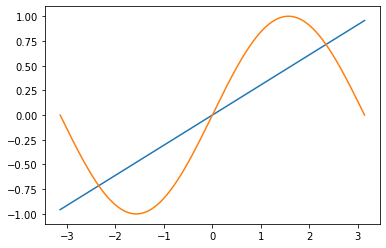

In [76]:
w_ = w.cpu().detach().numpy()
b_ = b.cpu().detach().numpy()
plt.plot(x.cpu(), (x.cpu() * w_) + b_)
plt.plot(x.cpu(), y.cpu())